In [21]:
import pandas as pd
import math
# Исходные данные CSV
data = pd.read_csv("../large_prime_numbers/test_results/Trial_division_01-04-2025 17-26-22.csv")

# Группировка по 'number' и вычисление статистик:
stats = data.groupby('number')['duration'].agg(
    mean_duration='mean',           # среднее время
    median_duration='median',       # медианное время
    q25_duration=lambda x: x.quantile(0.25),  # 25-й перцентиль
    q75_duration=lambda x: x.quantile(0.75)   # 75-й перцентиль
).reset_index()

stats['digits'] = stats['number'].apply(lambda x: len(str(x)))
stats['number_log10'] = stats['number'].apply(lambda x: math.log10(x))

print(stats)


              number  mean_duration  median_duration  q25_duration  \
0       100000000000       0.000002     6.000000e-07  5.000000e-07   
1       100123456789       0.038339     3.693900e-02  3.473272e-02   
2       100529784361       0.036494     3.314000e-02  3.238158e-02   
3       101103163367       0.032008     3.109195e-02  2.967130e-02   
4       101107157131       0.030070     2.970365e-02  2.886460e-02   
..               ...            ...              ...           ...   
608  555554444332213       2.295395     2.276240e+00  2.244505e+00   
609  578415690713087       2.364523     2.359600e+00  2.310833e+00   
610  597655503030737       2.365705     2.354005e+00  2.308637e+00   
611  610181912311877       2.355703     2.355990e+00  2.322483e+00   
612  666666666666631       2.536113     2.479200e+00  2.446540e+00   

     q75_duration  digits  number_log10  
0    6.000000e-07      12     11.000000  
1    4.069985e-02      12     11.000536  
2    4.013027e-02      12     11.

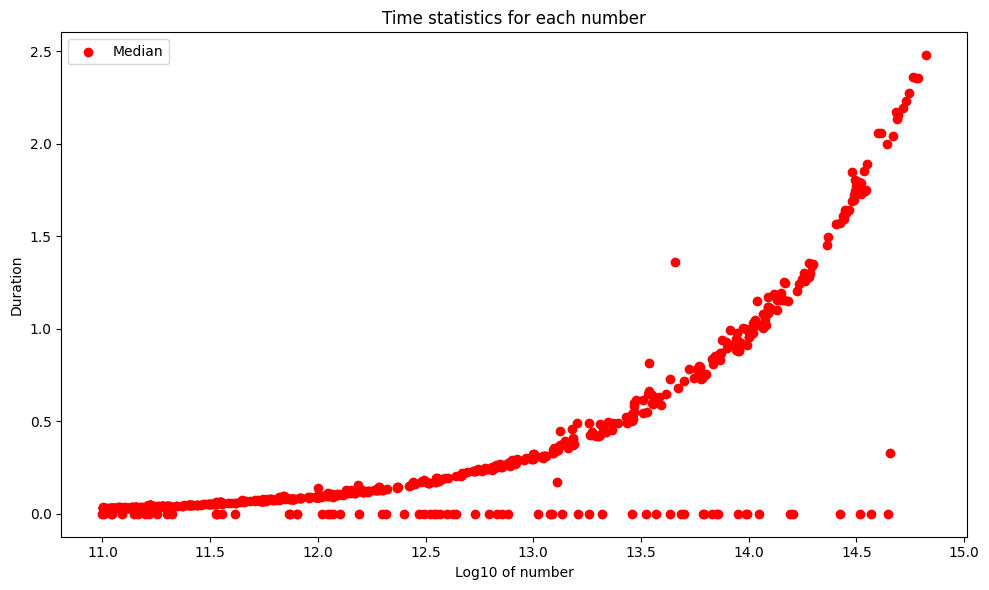

In [22]:
import matplotlib.pyplot as plt
# Настроим позиции по оси X для каждого уникального числа
x_pos = range(len(stats))

# Создадим фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Рассчитаем асимметричные "ошибки" для средних значений:
# Нижняя ошибка = разница между средним и 25-м перцентилем
# Верхняя ошибка = разница между 75-м перцентилем и средним
error_lower = stats['mean_duration'] - stats['q25_duration']
error_upper = stats['q75_duration'] - stats['mean_duration']
errors = [error_lower, error_upper]

# Построим график средних значений с "errorbar" для перцентилей
#ax.errorbar(x_pos, stats['mean_duration'], fmt='o', capsize=5, label='Среднее (с 25% и 75% квантилями)')

# Отобразим медианные значения отдельными точками
ax.scatter(stats['number_log10'], stats['median_duration'], color='red', zorder=5, label='Median')

# Оформление оси X
#ax.set_xticks(x_pos)
#ax.set_xticklabels(stats['number'], rotation=45, ha='right')
ax.set_xlabel('Log10 of number')
ax.set_ylabel('Duration')
ax.set_title('Time statistics for each number')
ax.legend()
plt.tight_layout()

plt.show()

In [24]:
import pandas as pd
import math
# Исходные данные CSV
data = pd.read_csv("../large_prime_numbers/test_results/Trial_division_01-04-2025 18-49-53.csv")

# Группировка по 'number' и вычисление статистик:
stats = data.groupby('number')['duration'].agg(
    mean_duration='mean',           # среднее время
    median_duration='median',       # медианное время
).reset_index()

stats['digits'] = stats['number'].apply(lambda x: len(str(x)))
stats['number_log10'] = stats['number'].apply(lambda x: math.log10(x))

print(stats)


                number  mean_duration  median_duration  digits  number_log10
0  9999999997777777333     315.886714          315.945      19          19.0
